In [65]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


실습 조교
자연어처리 연구실 

박사 과정 장영진

이메일 : danyon@konkuk.ac.kr


연구실 위치 : 신공학관 1007호

In [84]:
from sklearn.datasets import make_moons # 반달형 데이터 생성을 위한 라이브러리 추가
import matplotlib.pyplot as plt

def plotResult(X, y, title):
  # X : [[0.2, 0.3], [0.8, 0.9], .., []]
  # y :      0           1       , .., ..]
  # title : ~~~~~

  plt.scatter(X[y==0, 0], X[y==0, 1], c='lightblue', marker='o', s=40, label='Cluster 1')
  # plt.scatter(X, Y, )
  # y==0인 X 값을 lightblue color로 표현
  plt.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='s', s=40, label='Cluster 2')
  # y==1인 X 값을 red color로 표현

  # python의 list는 조건을 사용해 slice가 가능

  plt.title(title)
  # 좌표평면의 Title  설정
  plt.legend()
  plt.show()

[1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1
 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1]


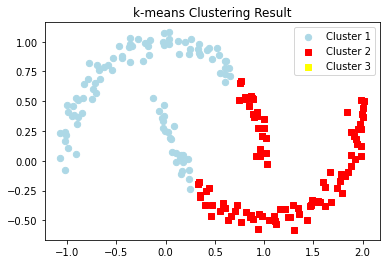

In [88]:
from sklearn.cluster import KMeans

X, _ = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
print(y_km)
plotResult(X, y_km, title='k-means Clustering Result')

[[ 0.81680544  0.5216447 ]
 [ 1.61859642 -0.37982927]
 [-0.02126953  0.27372826]
 [-1.02181041 -0.07543984]
 [ 1.76654633 -0.17069874]
 [ 1.8820287  -0.04238449]
 [ 0.97481551  0.20999374]
 [ 0.88798782 -0.48936735]
 [ 0.89865156  0.36637762]
 [ 1.11638974 -0.53460385]
 [-0.36380036  0.82790185]
 [ 0.24702417 -0.23856676]
 [ 1.81658658 -0.13088387]
 [ 1.2163905  -0.40685761]
 [-0.8236696   0.64235178]
 [ 0.98065583  0.20850838]
 [ 0.54097175  0.88616823]
 [ 0.348031   -0.30101351]
 [ 0.35181497  0.88827765]
 [-0.77708642  0.82253872]
 [ 1.92590813  0.01214146]
 [ 0.86096723 -0.47653216]
 [ 0.19990695  0.99672359]
 [ 1.2895301  -0.37071087]
 [-0.27847636  1.02538452]
 [ 0.24187916 -0.07627812]
 [ 1.84988768 -0.09773674]
 [ 1.88406869  0.0449402 ]
 [ 0.165822   -0.08613126]
 [ 0.13861369  0.89639036]
 [ 0.89087024  0.52265882]
 [-0.22806587  0.84091882]
 [ 0.98279208 -0.46457771]
 [ 0.04237749  0.19457898]
 [ 0.76422612  0.67223332]
 [ 1.91108938  0.21178339]
 [ 0.43608432 -0.23007221]
 

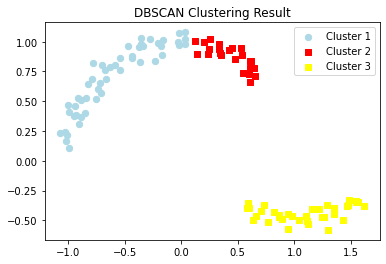

In [87]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
print(X)
db = DBSCAN(eps=0.3, min_samples=20, metric='euclidean')
y_db = db.fit_predict(X)

plotResult(X, y_db, title='DBSCAN Clustering Result')


문장 집합으로부터 단어(공백 기준, 심볼 제거)을 추출하고, 각 단어의 TF*IDF 가중치 계산

가중치 상위 200개를 선택하여 vocabulary를 생성

Vocabulary를 참조하여 각 문장을 200차원의 벡터로 표현
  예) Vocabulary = [apple, cluster, filter, spam, zoo]
       Input: This is a spam filter. ==> [0, 0, 1, 1, 0]

K-Means(k=2)를 수행한 후, 각 문장 별로 범주명(1 또는 2) 출력
